In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import pickle

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dm_vars = ['usdm', 'spi', ]

intervals = ['30d', '180d']

dm_vars_expanded = {
    'usdm':['USDM'],
    'spi':[f'spi_{interval}' for interval in intervals],
}

In [3]:
path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/event_comp'

In [4]:
event_comp = dict()

for var_a in dm_vars:
    for var_a_exp in dm_vars_expanded[var_a]:
        var_a_dict = dict()
        for var_b in dm_vars:
            for var_b_exp in dm_vars_expanded[var_b]:
                try:
                    open_path = f'{path}/{var_a_exp}_{var_b_exp}_comp.pickle'
                    with open (open_path, 'rb') as f:
                        unpickler = pickle.Unpickler(f)
                        var_a_dict[var_b_exp] = unpickler.load()
                except:
                    pass        

        event_comp[var_a_exp] = var_a_dict

In [5]:
event_comp['USDM']['USDM'].keys()

dict_keys(['matched_dates', 'af', 'df_USDM'])

In [6]:
event_comp['USDM']['USDM']['matched_dates']

,usdm
0,2000-01-04
1,2000-01-11
2,2000-01-18
3,2000-01-25
4,2000-02-01
...,...
1158,2022-03-15
1159,2022-03-22
1160,2022-03-29
1161,2022-04-05


In [7]:
event_comp['USDM']['USDM']['matched_dates'].iloc[list(event_comp['USDM']['USDM']['af'][0].keys())]

,usdm
1,2000-01-11
2,2000-01-18
3,2000-01-25
4,2000-02-01
5,2000-02-08
6,2000-02-15
7,2000-02-22
8,2000-02-29
9,2000-03-07
10,2000-03-14


In [8]:
sample = event_comp['USDM']['spi_30d']
sample

{'matched_dates':             spi                 usdm
 0    1999-12-31  2000-01-04 00:00:00
 1    2000-01-10  2000-01-11 00:00:00
 2    2000-01-15  2000-01-18 00:00:00
 3    2000-01-25  2000-01-25 00:00:00
 4    2000-01-30  2000-02-01 00:00:00
 ...         ...                  ...
 1144 2021-12-06  2021-12-07 00:00:00
 1145 2021-12-11  2021-12-14 00:00:00
 1146 2021-12-21  2021-12-21 00:00:00
 1147 2021-12-26  2021-12-28 00:00:00
 1148 2021-12-31  2022-01-04 00:00:00
 
 [1149 rows x 2 columns],
 'af': [{10: 0.0044986213902191265,
   11: 0.0032146588443301453,
   12: 0.09948979591836735,
   13: 0.08680555555555555,
   14: 0.08623493131483038,
   15: 0.12218025390829923,
   16: 0.0005483959418700301},
  {20: 0.0012757426644796792,
   21: 0.000606354596167839,
   22: 0.016193446030964495,
   23: 0.03625668449197861,
   24: 0.15385025313082867,
   25: 0.41067114368780966,
   26: 0.01064018442986345,
   27: 0.040764907293752824,
   28: 0.004686074479555445,
   29: 0.0029955460959363053,
  

In [9]:
event_comp['USDM']['spi_180d']

{'matched_dates':             spi                 usdm
 0    1999-12-31  2000-01-04 00:00:00
 1    2000-01-10  2000-01-11 00:00:00
 2    2000-01-15  2000-01-18 00:00:00
 3    2000-01-25  2000-01-25 00:00:00
 4    2000-01-30  2000-02-01 00:00:00
 ...         ...                  ...
 1144 2021-12-06  2021-12-07 00:00:00
 1145 2021-12-11  2021-12-14 00:00:00
 1146 2021-12-21  2021-12-21 00:00:00
 1147 2021-12-26  2021-12-28 00:00:00
 1148 2021-12-31  2022-01-04 00:00:00
 
 [1149 rows x 2 columns],
 'af': [{22: 0.0007669972059387498,
   23: 0.0006970509383378016,
   24: 0.00064343163538874,
   25: 0.0015112037519541429,
   26: 0.0005701254275940707,
   27: 0.0009876543209876543,
   28: 0.001081275905568571},
  {48: 0.0006797518905599456},
  {50: 8.49689863199932e-05,
   51: 0.0004540501271340356,
   52: 0.0003632401017072285},
  {58: 0.001045101537020019,
   59: 0.002624529394729221,
   60: 0.0012321428571428572,
   61: 0.001133592112946996,
   62: 0.0012194703033217684,
   63: 0.00310376

In [10]:
event_comp['spi_30d']['spi_180d']

KeyError: 'spi_180d'

## Network Check

Okay, so AF being nothing makes no sense. Let's check in with the networks.

In [9]:
net_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_dnet'

In [10]:
spi30d_usdm_match = dnet.DroughtNetwork.unpickle(f'{net_path}/spi_30d_net_usdm_match.pickle')

In [11]:
spi_array = spi30d_usdm_match.to_array()

In [12]:
import matplotlib.pyplot as plt

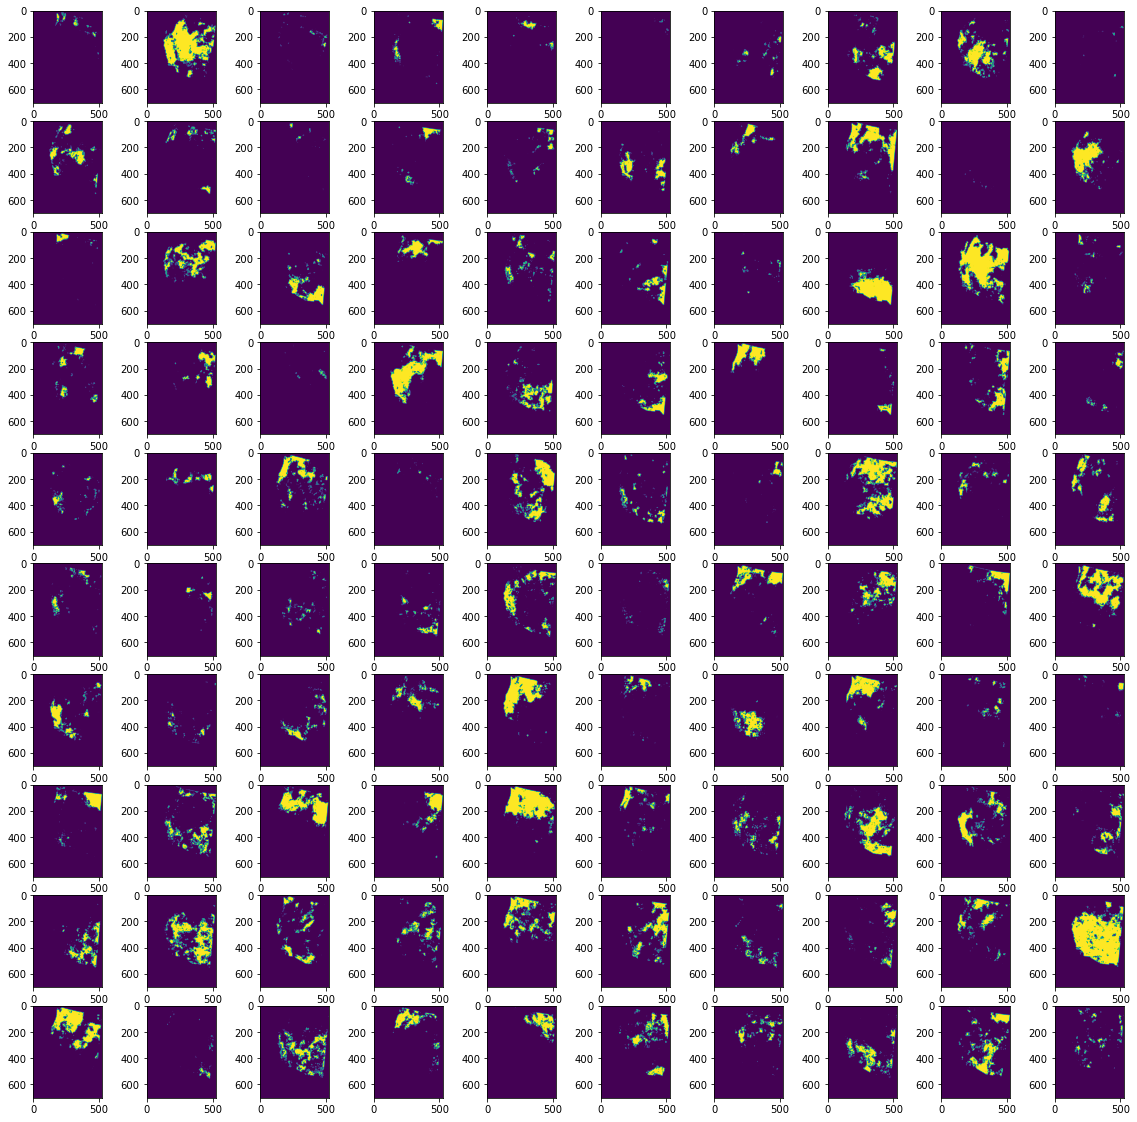

In [13]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(spi_array[10*i, :, :])
    ax.set_aspect('equal')
    ax.set_facecolor('k')

Okay, so data isn't missing ...

In [14]:
usdm_spi_match = dnet.DroughtNetwork.unpickle(f'{net_path}/USDM_net_spi_match.pickle')

In [15]:
usdm_array = usdm_spi_match.to_array()

KeyboardInterrupt: 

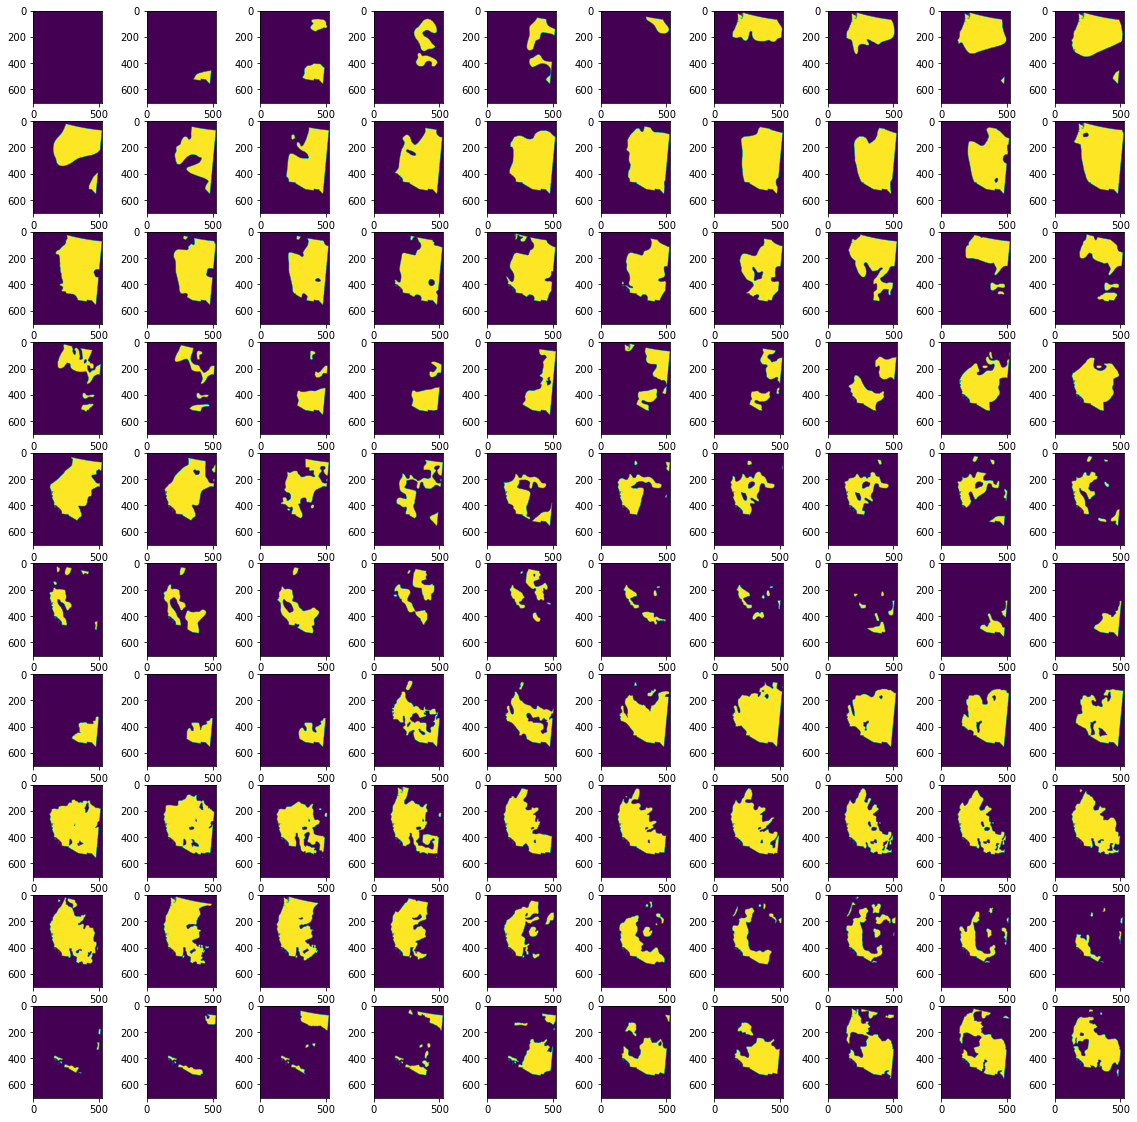

In [ ]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_array[10*i, :, :])
    ax.set_aspect('equal')
    ax.set_facecolor('k')

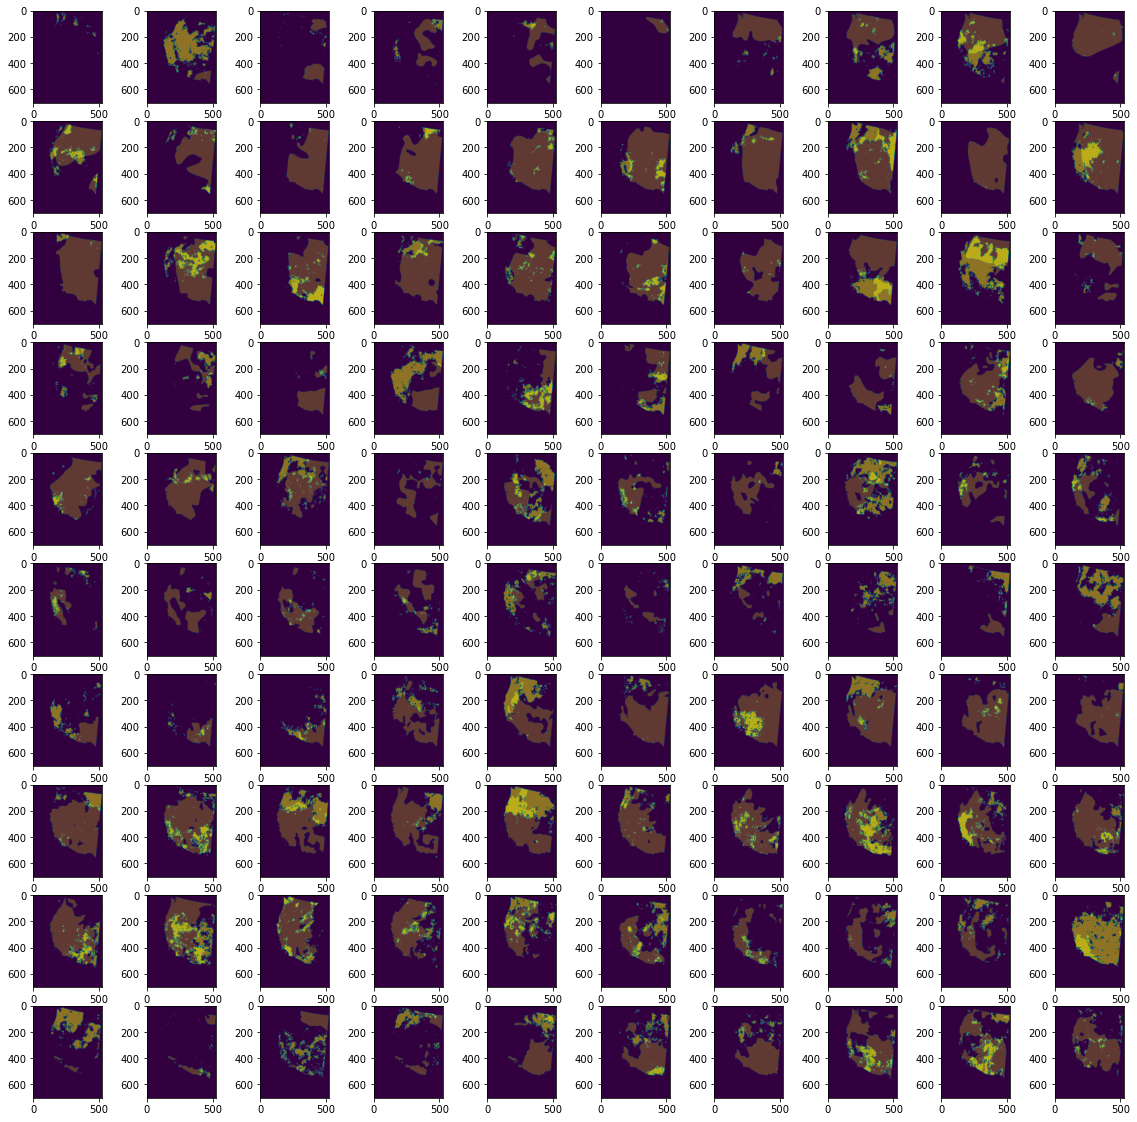

In [ ]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_array[10*i, :, :], alpha=0.5)
    ax.imshow(spi_array[10*i, :, :], alpha=0.5)
    ax.set_aspect('equal')
    ax.set_facecolor('k')

And they are clearly overlapping.

Let's pull out the overlapping events

In [ ]:
path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/event_comp/USDM_spi_30d_overlap.pickle'

with open(path, 'rb') as f:
    unpickler = pickle.Unpickler(f)
    overlap_events = unpickler.load()

In [ ]:
overlap_events

[]

Okay, so that explains that. It's not finding the overlapping events.

In [ ]:
len(usdm_array)

1148

In [ ]:
len(spi_array)

1149

Hm, that doesn't seem right to me, they should be the same size

I think the catch for when there are too many dates isn't working and therefore stuff is breaking down from a size mismatch

But wait, I already made a paired dataset?

In [16]:
paired_ds = xr.open_dataset('/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/paired_ds/usdm_spi_paired.nc')

In [17]:
paired_ds

<xarray.Dataset>
Dimensions:    (index: 1149, y: 702, x: 525)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
  * y          (y) float64 3.251e+06 3.246e+06 3.242e+06 ... 2.717e+05 2.674e+05
  * x          (x) float64 -2.893e+06 -2.889e+06 ... -6.674e+05 -6.632e+05
Data variables:
    USDM       (index, y, x) float64 ...
    USDM Date  (index) datetime64[ns] ...
    spi_14d    (index, y, x) float32 ...
    spi_30d    (index, y, x) float32 ...
    spi_90d    (index, y, x) float32 ...
    spi_180d   (index, y, x) float32 ...
    spi_270d   (index, y, x) float32 ...
    spi_1y     (index, y, x) float32 ...
    spi_2y     (index, y, x) float32 ...
    spi_5y     (index, y, x) float32 ...
    SPI Date   (index) datetime64[ns] ...

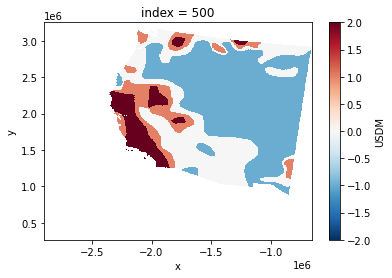

In [19]:
paired_ds['USDM'].isel(index=500).plot()

In [21]:
paired_ds[['USDM Date', 'SPI Date']].to_dataframe()

,USDM Date,SPI Date
index,,
0,2000-01-04,1999-12-31
1,2000-01-11,2000-01-10
2,2000-01-18,2000-01-15
3,2000-01-25,2000-01-25
4,2000-02-01,2000-01-30
...,...,...
1144,2021-12-07,2021-12-06
1145,2021-12-14,2021-12-11
1146,2021-12-21,2021-12-21


In [65]:
usdm_paired = paired_ds['USDM']

In [25]:
spi30d_paired = paired_ds['spi_30d']

In [70]:
usdm_binary = usdm_paired.values
usdm_binary[usdm_binary >= 1] = 1
usdm_binary[usdm_binary < 1] = 0

In [29]:
spi30d_binary = spi30d_paired.values
spi30d_binary[spi30d_binary >= 1] = 1
spi30d_binary[spi30d_binary < 1] = 0

In [30]:
combined_binary = usdm_binary + spi30d_binary

In [32]:
ones = []
twos = []

for t_step in combined_binary:
    uniq, counts = np.unique(np.hstack(t_step), return_counts=True)
    if uniq[1] == 1:
        ones.append(counts[1])
    else:
        ones.append(0)
    if uniq[2] == 2:
        twos.append(counts[2])
    else:
        twos.append(0)

In [33]:
ones = np.array(ones)
twos = np.array(twos)

In [35]:
jaccard = twos/(twos+ones)

In [36]:
dissim = np.sqrt(1-jaccard)

In [38]:
times = np.arange(len(jaccard))

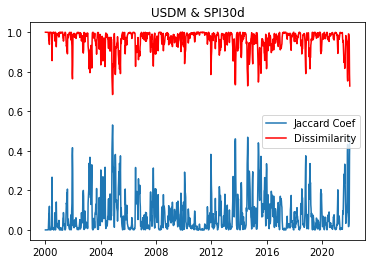

In [47]:
fig, ax = plt.subplots()

ax.plot(paired_ds['USDM Date'], jaccard, label='Jaccard Coef')
ax.plot(paired_ds['USDM Date'], dissim, color='r', label='Dissimilarity')
ax.set_title('USDM & SPI30d')
ax.legend()

In [83]:
spi180d_paired = paired_ds['spi_180d']

In [84]:
spi180d_binary = spi180d_paired.values
spi180d_binary[spi180d_binary >= 1] = 1
spi180d_binary[spi180d_binary < 0] = 0

In [85]:
usdm_paired = paired_ds['USDM']

In [86]:
usdm_binary = usdm_paired.values
usdm_binary[usdm_binary >= 1] = 1
usdm_binary[usdm_binary < 1] = 0

In [87]:
usdm_spi180d_combined_binary = usdm_binary + spi180d_binary

In [88]:
ones = []
twos = []

for t_step in usdm_spi180d_combined_binary:
    uniq, counts = np.unique(np.hstack(t_step), return_counts=True)
    if uniq[1] == 1:
        ones.append(counts[1])
    else:
        ones.append(0)
    if uniq[2] == 2:
        twos.append(counts[2])
    else:
        twos.append(0)

ones = np.array(ones)
twos = np.array(twos)

In [89]:
jaccard = twos/(twos+ones)

/tmp/ipykernel_2422807/2431005878.py:1: RuntimeWarning: invalid value encountered in true_divide
  jaccard = twos/(twos+ones)


In [90]:
dissim = np.sqrt(1-jaccard)

In [91]:
times = np.arange(len(jaccard))

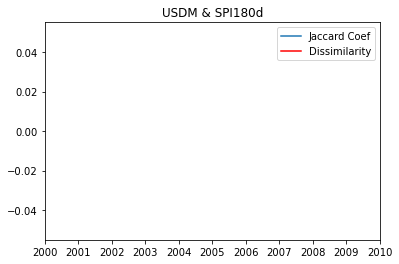

In [92]:
fig, ax = plt.subplots()

ax.plot(paired_ds['USDM Date'], jaccard, label='Jaccard Coef')
ax.plot(paired_ds['USDM Date'], dissim, color='r', label='Dissimilarity')
ax.set_title('USDM & SPI180d')
ax.legend()